<a href="https://colab.research.google.com/github/Kaif974/Clustering_Assignment/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q14.How can you find correlation between variables in Python?

In [1]:
import pandas as pd

# Sample DataFrame
data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [50, 60, 65, 70, 80],
    'Age': [25, 30, 35, 40, 45]
}

df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


          Height    Weight       Age
Height  1.000000  0.989949  1.000000
Weight  0.989949  1.000000  0.989949
Age     1.000000  0.989949  1.000000


Q15.What is causation? Explain difference between correlation and causation with an example.


Correlation Matrix:
                    Ice_Cream_Sales  Drowning_Incidents  Temperature
Ice_Cream_Sales            1.000000            0.993399     1.000000
Drowning_Incidents         0.993399            1.000000     0.993399
Temperature                1.000000            0.993399     1.000000


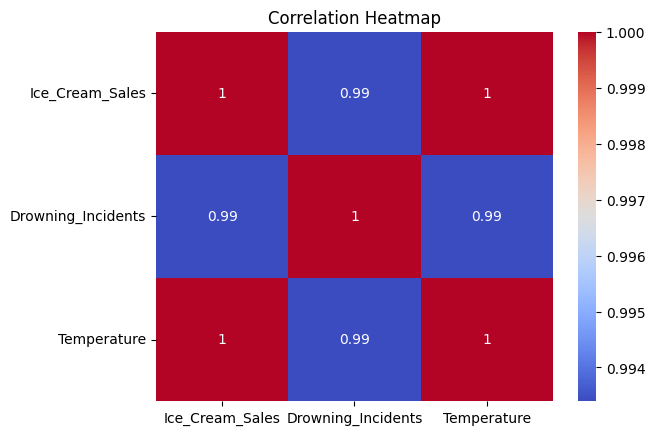

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data
data = {
    'Ice_Cream_Sales': [100, 150, 200, 250, 300],
    'Drowning_Incidents': [2, 3, 5, 6, 8],
    'Temperature': [20, 25, 30, 35, 40]  # Third variable
}

df = pd.DataFrame(data)

# Correlation matrix
print("Correlation Matrix:")
print(df.corr())

# Heatmap for visualization
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Q16.What is an Optimizer? What are different types of optimizers? Explain each with an example.

In [4]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target labels
# The 'sparse' argument was removed in scikit-learn version 1.2.
# Use 'sparse_output=False' instead if you're using an older version.
encoder = OneHotEncoder(sparse_output=False)  # Or handle_unknown='ignore' for newer versions
y_encoded = encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define a simple neural network model
def create_model(optimizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Choose different optimizers to test
optimizers = {
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.01)
}

# Train and evaluate each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer")
    model = create_model(optimizer)
    model.fit(X_train, y_train, epochs=20, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Accuracy: {accuracy:.4f}")


Training with SGD optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD Accuracy: 0.7667

Training with Momentum optimizer
Momentum Accuracy: 0.9333

Training with RMSProp optimizer
RMSProp Accuracy: 1.0000

Training with Adam optimizer
Adam Accuracy: 0.9333


Q19.What does model.predict() do? What arguments must be given?

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data (features: size in sqft, bedrooms | target: price)
X = np.array([[1000, 2], [1500, 3], [2000, 4], [2500, 4], [3000, 5]])
y = np.array([200000, 250000, 300000, 350000, 400000])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Predicted Prices:", y_pred)


Predicted Prices: [250000.]


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data (features: hours studied, attendance % | target: pass/fail)
X = np.array([[2, 70], [4, 80], [6, 65], [8, 90], [10, 95]])
y = np.array([0, 0, 1, 1, 1])  # 0 = fail, 1 = pass

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Predicted Labels (0=Fail, 1=Pass):", y_pred)


Predicted Labels (0=Fail, 1=Pass): [1 1]


Q22.How do we perform scaling in Python?

In [7]:
#Normalization (Min-Max Scaling)
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[1, 2], [3, 4], [5, 6]])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

print("Scaled Data (Min-Max):")
print(scaled_data)


Scaled Data (Min-Max):
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [8]:
#Standardization (Z-Score Scaling)
from sklearn.preprocessing import StandardScaler

data = np.array([[1, 2], [3, 4], [5, 6]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Scaled Data (Standardization):")
print(scaled_data)


Scaled Data (Standardization):
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


Q23.What is sklearn.preprocessing?

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)


In [12]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data)


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data)


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

labels = np.array(['cat', 'dog', 'cat', 'bird', 'dog'])

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels)

[1 2 1 0 2]


In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data)


In [17]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0)
binarized_data = binarizer.fit_transform(data)


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)


In [20]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a sample function (replace with your desired function)
def my_func(x):
    return x * 2

# Now use the defined function 'my_func'
transformer = FunctionTransformer(my_func)
transformed_data = transformer.fit_transform(data)
print(transformed_data)


[[ 2  4]
 [ 6  8]
 [10 12]]


Q24.How do we split data for model fitting (training and testing) in Python?

In [23]:
from sklearn.model_selection import train_test_split

# Example dataset (X features and y labels)
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]]  # Features
y = [1, 0, 1, 0, 1, 0]  # Labels (target variable)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:")
print(X_train)
print("Testing Features:")
print(X_test)
print("Training Labels:")
print(y_train)
print("Testing Labels:")
print(y_test)


Training Features:
[[11, 12], [5, 6], [9, 10], [7, 8]]
Testing Features:
[[1, 2], [3, 4]]
Training Labels:
[0, 1, 1, 0]
Testing Labels:
[1, 0]
